In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from rdfpy import rdf
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
import Gillespie_backend as backend
from multiprocessing import Pool

In [2]:
def get_position(tmax,dtout,dtreset,S):
  """
  return the linear position of the linkers every dT until tmax
  """
  position = np.zeros((tmax//dtout)-1, dtype= object)
  linkers = np.zeros((tmax//dtout)-1,dtype=object)
  #Nloop = np.zeros(tmax//dt,dtype= int)
  for step in range(tmax):
      if step%dtout==0 and step!=0:
          print(step)
          #Nloop[step//dt] = S.get_N_loop()
          position[step//dtout-1] = S.get_links_linear_position()
          linkers[step//dtout-1] = S.get_R()
      if step%dtreset == 0 and step!=0:
          S.reset_crosslinkers()
      S.evolve()
  return position,linkers

In [4]:
BindingEnergy = -10
ell_tot = 1000
#distance_anchor = 1000.
rho0 = 5.*10**-4
ttot = 10000
teq = 1000
t_compute = 1000
reset_linker_time = ttot//10 # number of time per simulation the crosslinkers are reset
seed = 9898654

In [5]:
Sslide = backend.Gillespie(ell_tot,rho0,BindingEnergy,np.exp(BindingEnergy),seed,sliding=False)
Snoslide = backend.Gillespie(ell_tot,rho0,BindingEnergy,np.exp(BindingEnergy),seed,sliding=False)
position_slide,linkers_slide = get_position(ttot,t_compute,reset_linker_time,Sslide)
position_noslide,linkers_noslide = get_position(ttot,t_compute,reset_linker_time,Snoslide)

1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [6]:
#for i in range(0,position.shape[0],10):
#i=2
#plt.scatter(position[i],[0 for _ in range(position[i].__len__())])
#i=position.__len__()//2
#plt.scatter(position[i],[1 for _ in range(position[i].__len__())])
#i=-1
#plt.scatter(position[i],[2 for _ in range(position[i].__len__())])
#plt.show()

We now plot the length in a strand as a function of the distance between the two binding points. In theory (see notes : SlidingLinkers), we should observe a decreasing function of the distance between the binding point. In other words, the smaller the distance between linkers, the stronger is the force that absorbs polymer length.

In [11]:
# Extract the linkers position
anchoring_distance_slide = list()
for R1,R2 in zip(Sslide.get_R(),Sslide.get_R()[1:]):
    anchoring_distance_slide.append(np.linalg.norm(R1-R2))
anchoring_distance_slide= np.array(anchoring_distance_slide)
# extract the length of the polymer between two linking point
polymer_length_slide = list()
for l1,l2 in zip(Sslide.get_ell_coordinates(),Sslide.get_ell_coordinates()[1:]):
    polymer_length_slide.append(l2-l1)
polymer_length_slide = np.array(polymer_length_slide)

In [12]:
# Extract the linkers position
anchoring_distance_noslide = list()
for R1,R2 in zip(Snoslide.get_R(),Snoslide.get_R()[1:]):
    anchoring_distance_noslide.append(np.linalg.norm(R1-R2))
anchoring_distance_noslide= np.array(anchoring_distance_noslide)
# extract the length of the polymer between two linking point
polymer_length_noslide = list()
for l1,l2 in zip(Snoslide.get_ell_coordinates(),Snoslide.get_ell_coordinates()[1:]):
    polymer_length_noslide.append(l2-l1)
polymer_length_noslide = np.array(polymer_length_noslide)

In [13]:
print('with sliding moves :')
print(polymer_length_slide.shape)
print(anchoring_distance_slide.shape)
print('without sliding moves :')
print(polymer_length_noslide.shape)
print(anchoring_distance_noslide.shape)

with sliding moves :
(81,)
(81,)
without sliding moves :
(94,)
(94,)


Text(0, 0.5, 'delta li')

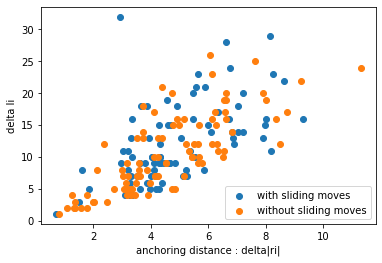

In [14]:
# plot li as a function of the anchoring distance
plt.scatter(anchoring_distance_slide,polymer_length_slide,label='with sliding moves')
plt.scatter(anchoring_distance_noslide,polymer_length_noslide,label='without sliding moves')
plt.legend()
plt.xlabel('anchoring distance : delta|ri|')
plt.ylabel('delta li')

In [15]:
Nloop = np.array([p.__len__() for p in position])
plt.plot(np.arange(0,Nloop.__len__(),1),Nloop)

NameError: name 'position' is not defined

In [10]:
g0,r0 = rdf(position[0],dr=1)
g1,r1 = rdf(position[position.__len__()//2],dr=1)
g2,r2 = rdf(position[-1],dr=1)
plt.scatter(r0[1:],g0[1:],label='steps ')
plt.scatter(r1[1:],g1[1:])
plt.scatter(r2[1:],g2[1:])

AssertionError: particles should be an array of shape N x d, where N is                      the number of particles and d is the number of dimensions.

/home/hcleroy/anaconda3/lib/python3.8/site-packages/rdfpy/rdfpy.py:27: RuntimeWarning: invalid value encountered in double_scalars
  g_r_partial[r_idx] /= n_valid*shell_vol*rho
/home/hcleroy/anaconda3/lib/python3.8/site-packages/rdfpy/rdfpy.py:27: RuntimeWarning: invalid value encountered in double_scalars
  g_r_partial[r_idx] /= n_valid*shell_vol*rho


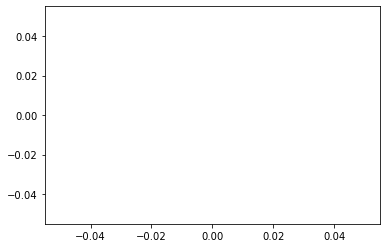

In [12]:
g0,r0 = rdf(linkers[0],dr=5)
g1,r1 = rdf(linkers[linkers.__len__()//2],dr=5)
g2,r2 = rdf(linkers[-1],dr=5)
plt.scatter(r0[1:],g0[1:],label='steps ')
plt.scatter(r1[1:],g1[1:])
plt.scatter(r2[1:],g2[1:])

In [11]:
S = backend.Gillespie(100,rho0,BindingEnergy,seed)

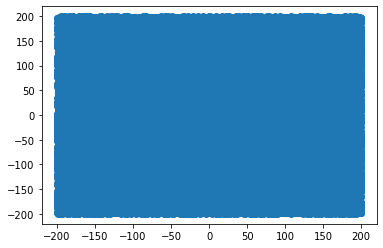

In [12]:
plt.scatter(S.get_r()[:,0],S.get_r()[:,1])

In [13]:
g_r, radii = rdf(S.get_r(), dr=1.)

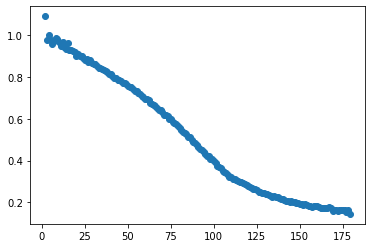

In [14]:
plt.scatter(radii[1:],g_r[1:])

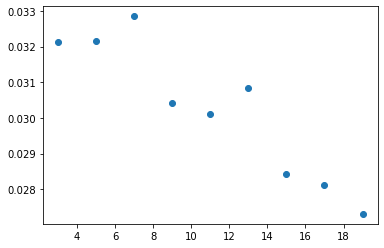

In [11]:

g0,r0 = S.compute_correlation_function(S.get_r(),distmax=20)

plt.scatter(r0[1:],g0[1:])

In [12]:
bind,time = S.evolve(steps=100)

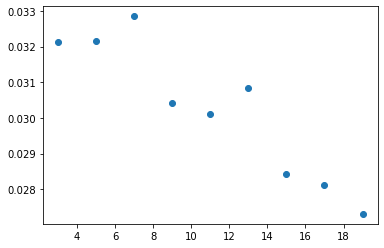

In [13]:

g0,r0 = S.compute_correlation_function(S.get_r(),distmax=20)

plt.scatter(r0[1:],g0[1:])

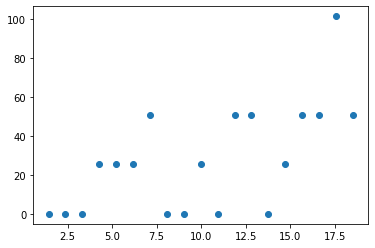

In [15]:
g0,r0 = S.compute_correlation_function(S.get_links_linear_position(),distmax=20,bins=20)
plt.scatter(r0[1:],g0[1:])